### Desafío - Dimensionalidad y Agrupación (II)

<br>
<br>

Nombre: **Julio Valdés**

Profesor: Gabriel Tamayo

Generación: **G5**


* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip



### Desafío 1: Preparación del ambiente de trabajo
Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas
de álbumes.

* Las imágenes se encuentran en una carpeta con el nombre album_covers

* Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg .

El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores.

Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
* Comencemos por incluír las librerías clásicas: pandas , numpy y matplotlib.pyplot .
* sklearn.cluster.KMeans : para extraer los principales componentes de una matriz numérica.
* skimage.io : Para poder ingresar y leer imágenes.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io

### Desafío 2: Importación de imagenes
* Comencemos por ingresar una imágen a nuestro ambiente de trabajo. Para ello ocuparemos io.imread . ¿Qué devuelve?

* Para visualizar la imágen en el notebook, ocupe io.imshow .

<IPython.core.display.Javascript object>


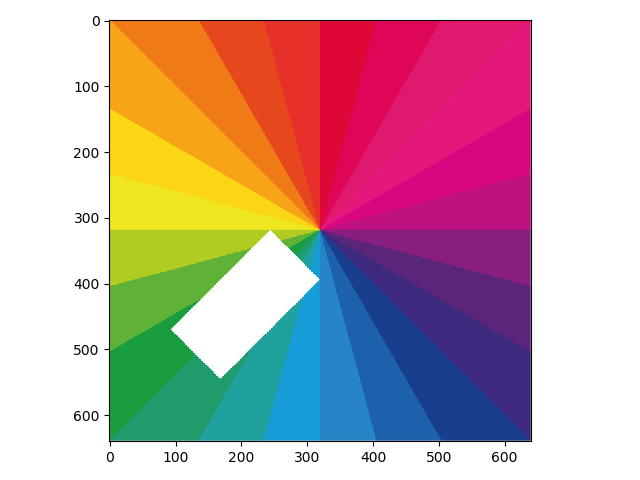

In [80]:
img = io.imread("album_covers/jamie-xx-in-colour.jpeg")
plt.figure()
io.imshow(img)

### El método imread retorna un array con el RGB de cada pixel de la imagen. Por lo tanto si la imagen es de 640 x 640 pixeles, el array obtenido es de (640, 640, 3).


### Desafío 3: Preprocesamiento de imágenes y KMeans
* Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales (RGB) mediante shape .
* Posteriormente redimensionaremos la imágen con reshape. 
    (Tips: reshape(heigth * width , rgb))
    
* Partamos por inicializar nuestro algoritmo KMeans con un k=8 , ¿Qué significará esto?
* Vuelva a implementar el mismo algoritmo con MiniBatchKMeans . ¿Qué diferencia existe con KMeans ?

In [73]:
print("La representación numérica de la imagen tiene las siguientes dimensiones: {}".format(img.shape))

La representación numérica de la imagen tiene las siguientes dimensiones: (640, 640, 3)


In [74]:
img_ = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
img_.shape

(409600, 3)

### Al seleccionar un k=8 estamos buscando 8 grupos o clusters en los datos de la imagen

In [39]:
%%time
kmeans = KMeans(n_clusters=8, random_state=11238)
fit_results = kmeans.fit_predict(img_)
print(pd.Series(kmeans.labels_).value_counts('%'))
print("Inercia del modelo {}".format(kmeans.inertia_))

6    0.216824
5    0.177290
3    0.137783
7    0.105547
1    0.105527
2    0.104780
0    0.096582
4    0.055667
dtype: float64
Inercia del modelo 423009967.28031296
CPU times: user 7.19 s, sys: 484 ms, total: 7.68 s
Wall time: 4.24 s


In [40]:
%%time
kmbmeans = MiniBatchKMeans(n_clusters=8, random_state=11238)
fit_results = kmbmeans.fit_predict(img_)
print(pd.Series(kmbmeans.labels_).value_counts('%'))
print("Inercia del modelo {}".format(kmbmeans.inertia_))

2    0.216680
0    0.209768
7    0.124592
6    0.105935
5    0.099377
4    0.096780
1    0.091204
3    0.055664
dtype: float64
Inercia del modelo 455492609.1828546
CPU times: user 1.53 s, sys: 17.8 ms, total: 1.55 s
Wall time: 1.55 s


### Comentarios:
* Al implementar el mismo algoritmo con k=8 usando KMeans y MiniBatchKMeans se observa que en ambos métodos la cantidad de datos en los clusters no es homogenea y en ambos métodos la inercia es similar.
* Al medir el tiempo de ejecución en ambos métodos se observa que MiniBatchKMeans se desempeña mucho mejor, usando menos de la mitad del tiempo que KMeans. 

### Desafío 4: Extracción de valores
* Ahora extraeremos las etiquetas predichas con labels_ . Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en éstos, debemos extraer los valores de los centroides.
* Para extraer los centroides (valores característicos), utilicemos el atributo cluster_centers_ .
* Con las etiquetas, generaremos un conteo de ocurrencia con np.unique . Para extraer el conteo, debemos implementar la opción return_counts=True .

In [44]:
centroids = kmbmeans.cluster_centers_
labels = kmbmeans.labels_
ocurrencias = np.unique(labels, return_counts = True)
ocurrencias

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([85921, 37357, 88752, 22800, 39641, 40705, 43391, 51033]))

In [69]:
def draw_cluster(data,centroids,labels,inertia):
    colors = {
        "0":"red",
        "1":"blue",
        "2":"green",
        "3":"black",
        "4":"red",
        "5":"blue",
        "6":"green",
        "7":"black"
         }
    c_col = list(map(lambda x: colors[str(x)],labels.tolist()))
    c_col_centroid = list(map(lambda x: colors[str(x)],range(len(centroids))))
    plt.figure(figsize=(10,8))
    plt.scatter(data[:, 0], data[:, 1], s=10,color=c_col)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='cyan', s=300,marker='o')
    plt.Text(0,0,str(inertia))

<IPython.core.display.Javascript object>


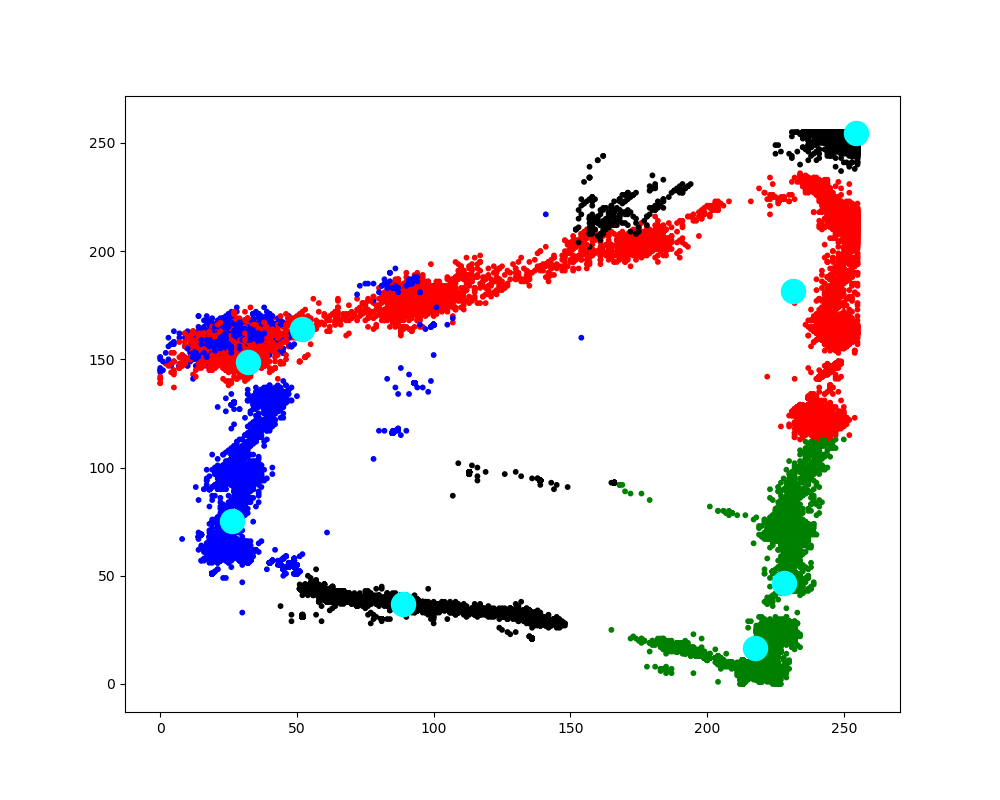

In [77]:
draw_cluster(img_, centroids, labels, kmbmeans.inertia_)

### Desafío 5: Conversión rgb a hex

* Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con map por cada centroide.

In [46]:
def rgb_hex_it(rgb):
    tmp=list(map(lambda x: int(x), rgb))
    return "#%02x%02x%02x" % (tmp[0], tmp[1], tmp[2])

In [48]:
centroids_hex = list(map(rgb_hex_it, centroids))
centroids_hex

['#e7b519',
 '#1a4b99',
 '#d91074',
 '#fefefe',
 '#33a353',
 '#1f94c2',
 '#e42e28',
 '#58257c']

### Desafío 6: Definición de base
Ahora generaremos un DataFrame con las siguientes variables:
* El color hex .
* La ocurrencia del color en cada pixel count .
* El porcentaje de ocurrencia de cada color respecto a cluster_centers_ .

Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.

In [49]:
df = pd.DataFrame({
    'hex': centroids_hex, 'ocurrencia': ocurrencias[1], 'porcentaje': ocurrencias[1]/sum(ocurrencias[1])
})
df.sort_values('porcentaje', ascending=False, inplace=True)
df.head(10)

,hex,ocurrencia,porcentaje
2,#d91074,88752,0.216680
0,#e7b519,85921,0.209768
7,#58257c,51033,0.124592
6,#e42e28,43391,0.105935
5,#1f94c2,40705,0.099377
4,#33a353,39641,0.096780
1,#1a4b99,37357,0.091204
3,#fefefe,22800,0.055664


### Desafío 7: Visualización

Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar
coloreadas con el color inferido.

<BarContainer object of 8 artists>

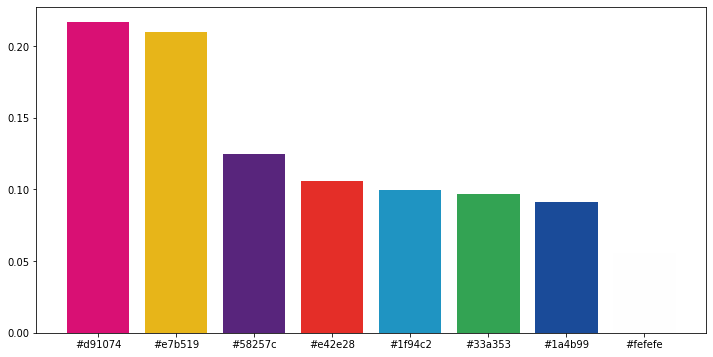

In [52]:
plt.figure(figsize=(12, 6))
plt.bar(df['hex'], df['porcentaje'], color = df['hex'])

<IPython.core.display.Javascript object>


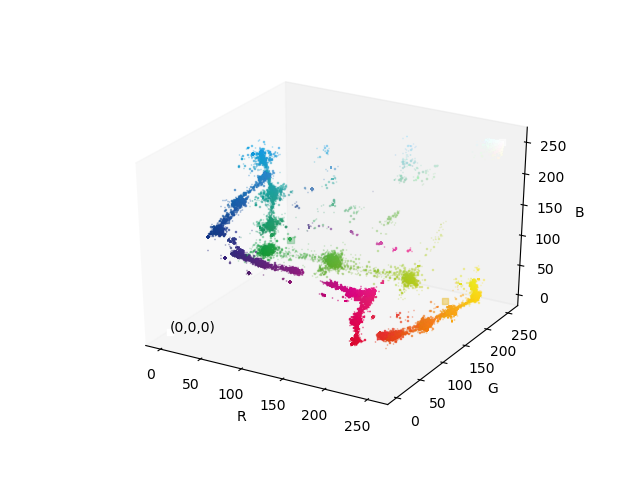

In [59]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 

extract_center = centroids
reshape_imagen=img_

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

colors_centros =  list(map(lambda x: rgb_hex_it(x), extract_center ))

ax.scatter(extract_center[:,0], extract_center[:,1], extract_center[:,2], linewidth=1, marker="s",
           c=colors_centros);

colors_points = list(map(lambda x: rgb_hex_it(x), reshape_imagen ))
    
    
ax.scatter(reshape_imagen[:,0], reshape_imagen[:,1], reshape_imagen[:,2], linewidth=1, marker="s",
           c=colors_points, s=0.1);

ax.scatter(0, 0, 0, linewidth=1, marker="s",c='w');

ax.text(0, 0, 0, "(0,0,0)", color='black') # Agregado solo para visualizar el origen

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax.grid(False)

plt.show()